In [16]:
import pandas as pd
df = pd.read_csv("UK_Engineered_Data.csv")
pd.set_option('display.max_columns', None)

In [17]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,name,distance_m,duration_s,ascent_m,descent_m,steps,turns,Asphalt,Unknown,Paved,Compacted Gravel,Wood,Gravel,Paving Stones,Ground,Concrete,Grass,Metal,Unpaved,Dirt,Grass Paver,Sand,Road,Cycleway,State Road,Track,Street,Path,Footway,Unknown.1,Steps,Construction,Ferry,uphill_very_steep (7% to 10%),uphill_moderate (3% to 5%),uphill_gentle (0% to 3%),flat (0%),downhill_gentle (-5% to 0%),uphill_steep (5% to 7%),uphill_extreme (>10%),downhill_extreme (<-15%),downhill_moderate (-7% to -5%),downhill_steep (-10% to -7%),downhill_very_steep (-15% to -10%),Average_Speed,Turn_Density
0,0,50,1677043,Yorkshire Wolds Cycle Route,67.3,13.5,0.0,0.0,2,0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.985185,0.0
1,1,51,2924632,Ride North Wales,1617.8,323.6,88.9,1.9,2,0,0.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.14,13.79,62.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.999382,0.0
2,2,52,8603353,Living Landscapes (Short Route),149.6,29.9,2.0,0.0,2,0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.003344,0.0
3,3,53,1124203,Sperrins Route 5 - Lough Fea Cycle Route,88.7,17.7,3.0,0.0,2,0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.011299,0.0
4,4,54,913519,Unnamed route,910.0,203.6,0.6,10.6,2,0,18.18,81.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.82,18.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.469548,0.0


In [21]:
X = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'name'], axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
scaler = ColumnTransformer(transformers=[
    ('standard', StandardScaler(), ['distance_m', 'duration_s', 'ascent_m', 'descent_m', 'Turn_Density', 'Average_Speed', 'steps', 'turns']),
    ('minmax', MinMaxScaler(), ['Asphalt', 'Unknown', 'Paved', 'Compacted Gravel', 'Wood', 'Gravel', 'Paving Stones', 'Ground', 'Concrete', 'Grass', 'Metal', 'Unpaved', 'Dirt', 'Grass Paver', 'Sand', 'Road', 'Cycleway', 'State Road', 'Track', 'Street', 'Path', 'Footway', 'Unknown.1', 'Steps', 'Construction', 'Ferry', 'uphill_very_steep (7% to 10%)', 'uphill_moderate (3% to 5%)', 'uphill_gentle (0% to 3%)', 'flat (0%)', 'downhill_gentle (-5% to 0%)', 'uphill_steep (5% to 7%)', 'uphill_extreme (>10%)', 'downhill_extreme (<-15%)', 'downhill_moderate (-7% to -5%)', 'downhill_steep (-10% to -7%)', 'downhill_very_steep (-15% to -10%)']),
    # ('robust', RobustScaler(), ['num_turns', 'num_segments'])
], remainder='passthrough')  # keep other features as is
X_scaled = scaler.fit_transform(X)


## Creating Train Test Split + running our first model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
# Example experiment
X_train, X_test = train_test_split(X_scaled, test_size=0.2)

In [27]:
# building and trianing the model
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X_train)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [28]:
distances, indices = knn.kneighbors(X_test)

In [33]:
print(distances)

[[0.00605538 0.00642539 0.00664549 0.00775399 0.00804853]
 [0.30378726 0.31823133 0.35455099 0.36187651 0.37597888]
 [1.00331612 1.00376198 1.00416908 1.00420998 1.00435001]
 ...
 [0.01004426 0.01092919 0.01457672 0.01459588 0.01484215]
 [0.66931465 0.67879802 0.72295339 0.72370068 0.72424255]
 [0.4236083  0.46898678 0.54186625 0.57242755 0.59670796]]


In [35]:
indices

array([[ 823, 4141, 6092, 3262, 3411],
       [2752, 3616,  182, 1121, 3275],
       [ 615,  751,  888, 3766, 5253],
       ...,
       [3136, 3898, 2493, 3792, 3889],
       [5376, 1219, 5977, 2888, 4433],
       [2570, 4575, 4827, 3387, 3220]], shape=(1544, 5))

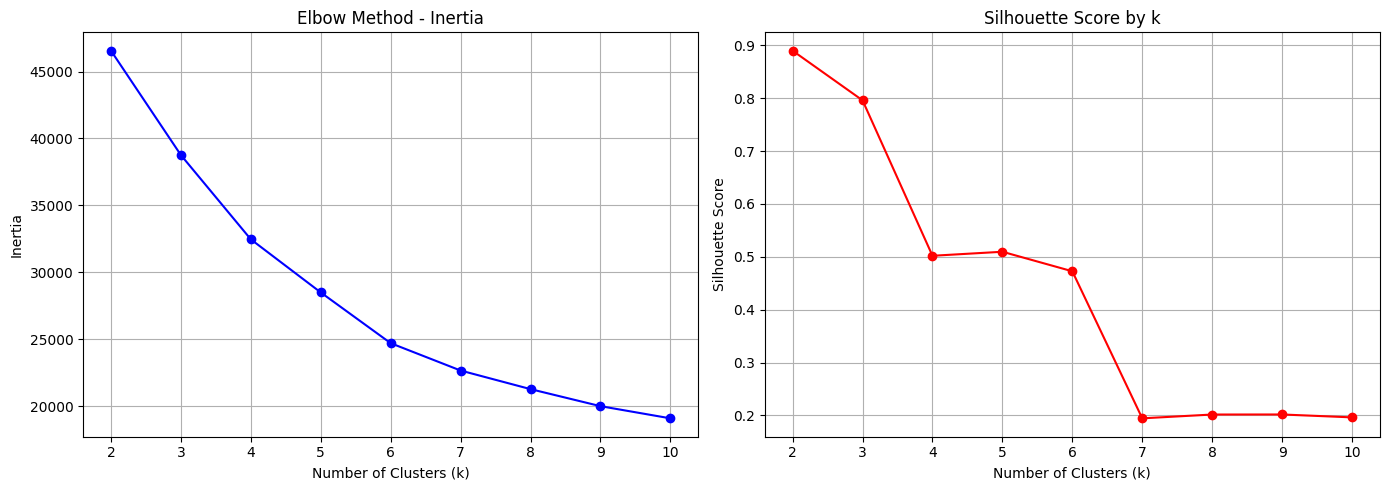

Silhouette scores for each k:
k=2: 0.8900
k=3: 0.7961
k=4: 0.5020
k=5: 0.5096
k=6: 0.4727
k=7: 0.1944
k=8: 0.2016
k=9: 0.2017
k=10: 0.1962


In [36]:
## Option 1: K-Means Clustering (Unsupervised - finds natural groupings)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method - Inertia')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score by k')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Silhouette scores for each k:")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

In [38]:
neighbors = df.iloc[indices[0]]
neighbors[['name', 'distance_m', 'ascent_m', 'duration_s']]

,name,distance_m,ascent_m,duration_s
823,Medmerry Cycle Routes,6669.0,14.8,1950.9
4141,Cycleway 5,414.4,4.0,82.9
6092,Unnamed route,188.4,0.0,37.7
3262,Unnamed route,1052.0,8.1,234.5
3411,Malvern LCN Route 9,1305.2,9.0,286.1


In [39]:
# Save the route IDs for reference
route_ids = df['id'].values
route_names = df['name'].values

# Create a recommendation function
def recommend_routes(input_features, n_recommendations=5):
    """
    Given a set of route features, return the most similar route IDs

    Parameters:
    - input_features: dict or DataFrame with same columns as X
    - n_recommendations: number of routes to recommend

    Returns:
    - DataFrame with recommended routes and their distances
    """
    # Convert input to DataFrame if it's a dict
    if isinstance(input_features, dict):
        input_df = pd.DataFrame([input_features])
    else:
        input_df = input_features

    # Scale the input features
    input_scaled = scaler.transform(input_df)

    # Find nearest neighbors
    distances, indices = knn.kneighbors(input_scaled,
n_neighbors=n_recommendations)

    # Get the route IDs and names
    recommended_ids = route_ids[indices[0]]
    recommended_names = route_names[indices[0]]
    recommended_distances = distances[0]

    # Create results DataFrame
    results = pd.DataFrame({
        'route_id': recommended_ids,
        'route_name': recommended_names,
        'similarity_distance': recommended_distances,
        'index': indices[0]
    })

    return results

# Test it with an example route from the test set
test_route_index = 0
test_features = pd.DataFrame(X_test[test_route_index].reshape(1, -1),
columns=X.columns)

print("Input route features (scaled):")
print(test_features.iloc[0])
print("\n" + "="*80 + "\n")

recommendations = recommend_routes(test_features, n_recommendations=5)
print("Recommended Routes:")
print(recommendations)


Input route features (scaled):
distance_m                           -0.201636
duration_s                           -0.212361
ascent_m                             -0.207404
descent_m                            -0.200730
steps                                -0.447503
turns                                 0.452712
Asphalt                              -0.310038
Unknown                              -0.317739
Paved                                 1.000000
Compacted Gravel                      0.000000
Wood                                  0.000000
Gravel                                0.000000
Paving Stones                         0.000000
Ground                                0.000000
Concrete                              0.000000
Grass                                 0.000000
Metal                                 0.000000
Unpaved                               0.000000
Dirt                                  0.000000
Grass Paver                           0.000000
Sand                         

In [40]:
df

,Unnamed: 0.1,Unnamed: 0,id,name,distance_m,duration_s,ascent_m,descent_m,steps,turns,Asphalt,Unknown,Paved,Compacted Gravel,Wood,Gravel,Paving Stones,Ground,Concrete,Grass,Metal,Unpaved,Dirt,Grass Paver,Sand,Road,Cycleway,State Road,Track,Street,Path,Footway,Unknown.1,Steps,Construction,Ferry,uphill_very_steep (7% to 10%),uphill_moderate (3% to 5%),uphill_gentle (0% to 3%),flat (0%),downhill_gentle (-5% to 0%),uphill_steep (5% to 7%),uphill_extreme (>10%),downhill_extreme (<-15%),downhill_moderate (-7% to -5%),downhill_steep (-10% to -7%),downhill_very_steep (-15% to -10%),Average_Speed,Turn_Density
0,0,50,1677043,Yorkshire Wolds Cycle Route,67.3,13.5,0.0,0.0,2,0,100.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.985185,0.000000
1,1,51,2924632,Ride North Wales,1617.8,323.6,88.9,1.9,2,0,0.00,100.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,24.14,13.79,62.07,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.999382,0.000000
2,2,52,8603353,Living Landscapes (Short Route),149.6,29.9,2.0,0.0,2,0,100.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.003344,0.000000
3,3,53,1124203,Sperrins Route 5 - Lough Fea Cycle Route,88.7,17.7,3.0,0.0,2,0,100.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,100.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.011299,0.000000
4,4,54,913519,Unnamed route,910.0,203.6,0.6,10.6,2,0,18.18,81.82,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,81.82,18.18,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.469548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,7712,7951,14533685,Unnamed route,2447.3,515.9,19.2,18.2,13,11,92.08,0.99,0.00,0.00,0.0,0.0,6.93,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,25.74,56.44,10.89,0.00,3.96,0.0,2.97,0.00,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.743749,4.494749
7713,7713,7952,11368377,ELOR Cycle (P),937.6,328.9,4.2,3.4,13,9,40.00,60.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.00,10.00,12.00,0.00,14.00,4.0,10.00,22.00,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.850715,9.598976
7714,7714,7953,19113798,Unnamed route,1992.5,399.7,19.4,29.4,13,10,87.06,0.00,11.76,0.00,0.0,0.0,0.00,0.0,1.18,0.0,0.0,0.0,0.0,0.0,0.0,71.76,18.82,0.00,0.00,8.24,0.0,1.18,0.00,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.984989,5.018821
7715,7715,7954,19902865,Unnamed route,3196.1,660.6,11.6,14.6,27,25,65.25,13.56,16.10,0.00,0.0,0.0,3.39,0.0,1.69,0.0,0.0,0.0,0.0,0.0,0.0,27.12,44.07,0.00,0.00,25.42,0.0,3.39,0.00,0.0,0.0,0.0,0.00,0.00,0.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.838177,7.822033


In [42]:
df_filtered = df[df['id'] == 8733142]
df_filtered

,Unnamed: 0.1,Unnamed: 0,id,name,distance_m,duration_s,ascent_m,descent_m,steps,turns,Asphalt,Unknown,Paved,Compacted Gravel,Wood,Gravel,Paving Stones,Ground,Concrete,Grass,Metal,Unpaved,Dirt,Grass Paver,Sand,Road,Cycleway,State Road,Track,Street,Path,Footway,Unknown.1,Steps,Construction,Ferry,uphill_very_steep (7% to 10%),uphill_moderate (3% to 5%),uphill_gentle (0% to 3%),flat (0%),downhill_gentle (-5% to 0%),uphill_steep (5% to 7%),uphill_extreme (>10%),downhill_extreme (<-15%),downhill_moderate (-7% to -5%),downhill_steep (-10% to -7%),downhill_very_steep (-15% to -10%),Average_Speed,Turn_Density
2592,2592,2671,8733142,Unnamed route,2362.3,472.4,19.3,20.3,4,2,67.24,32.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.14,0.0,25.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000635,0.846633


In [43]:
df_filtered = df[df['id'] == 154951]
df_filtered

,Unnamed: 0.1,Unnamed: 0,id,name,distance_m,duration_s,ascent_m,descent_m,steps,turns,Asphalt,Unknown,Paved,Compacted Gravel,Wood,Gravel,Paving Stones,Ground,Concrete,Grass,Metal,Unpaved,Dirt,Grass Paver,Sand,Road,Cycleway,State Road,Track,Street,Path,Footway,Unknown.1,Steps,Construction,Ferry,uphill_very_steep (7% to 10%),uphill_moderate (3% to 5%),uphill_gentle (0% to 3%),flat (0%),downhill_gentle (-5% to 0%),uphill_steep (5% to 7%),uphill_extreme (>10%),downhill_extreme (<-15%),downhill_moderate (-7% to -5%),downhill_steep (-10% to -7%),downhill_very_steep (-15% to -10%),Average_Speed,Turn_Density
3835,3835,3914,154951,Unnamed route,1414.0,284.8,7.1,4.1,17,12,90.91,0.0,7.27,0.0,0.0,0.0,0.0,0.0,1.82,0.0,0.0,0.0,0.0,0.0,0.0,1.82,45.45,0.0,0.0,50.91,0.0,1.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.964888,8.486563
